# Redes Neuronales


In [1]:
import numpy as np

from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import h5py

%matplotlib inline

In [2]:
def load_dataset():
    train_dataset = h5py.File('demo_6_dataset/train_catvnoncat.h5', "r")
    # your train set features
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(
        train_dataset["train_set_y"][:])  # your train set labels

    test_dataset = h5py.File('demo_6_dataset/test_catvnoncat.h5', "r")
    # your test set features
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(
        test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Repaso de algunas funciones de activación


### ReLU


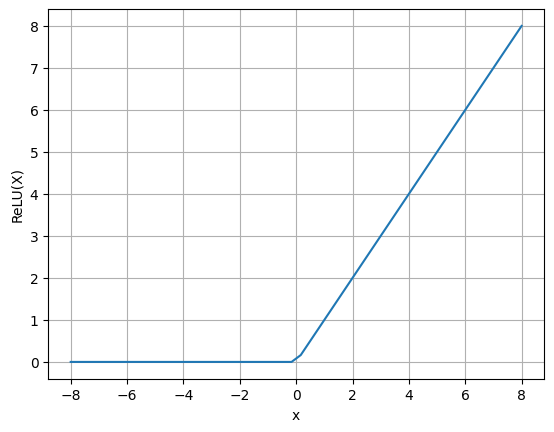

In [3]:
eje_x = np.linspace(-8, 8)


def ReLU(x):
    return np.array([xi if xi >= 0 else 0 for xi in x])


plt.plot(eje_x, ReLU(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('ReLU(X)')
plt.show()

### Sigmoide


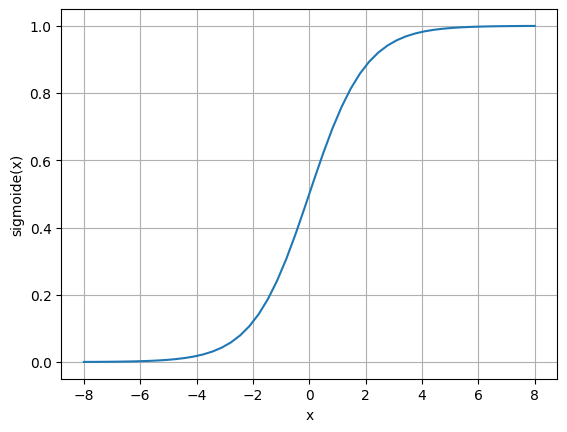

In [4]:
def sigmoide(x):
    return 1.0 / (1 + np.exp(-x))


plt.plot(eje_x, sigmoide(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('sigmoide(x)')
plt.show()

### Tangente hiperbólica


Text(0, 0.5, 'tanh(x)')

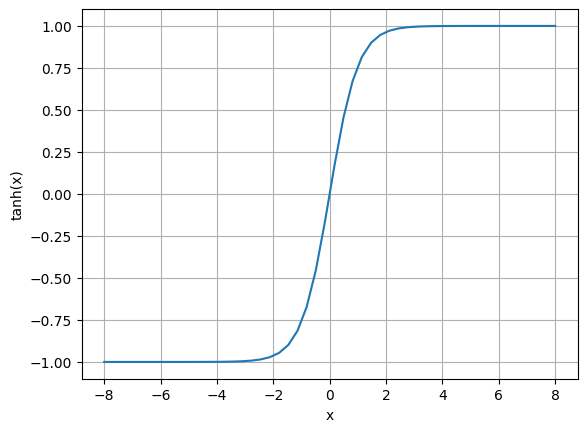

In [5]:
plt.plot(eje_x, np.tanh(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('tanh(x)')

## El problema: Determinar si una imagen tiene o no tiene un gato, dado un conjunto de datos con etiquetas.


<table>
  <tr>
    <th>Cat</th>
    <td> <img src="https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Te%C3%B3rico/images/cat1.jpg" width="150"></td>
    <td> <img src="https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Te%C3%B3rico/images/cat2.png" width="150"></td>
   </tr> 
   <tr>
      <th>Non Cat</th>
      <td> <img src="https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Te%C3%B3rico/images/no_cat1.jpeg" width="150"></td>
      <td> <img src="https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Te%C3%B3rico/images/no_cat2.jpg" width="150"></td>
  </tr>
</table>


In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

## Normalización


útil para que no haya valores muy grandes de gradiente


In [7]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1)
X_train = X_train/255.
X_test = X_test/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

Observamos algún caso


y = [1], it's a 'cat' picture.


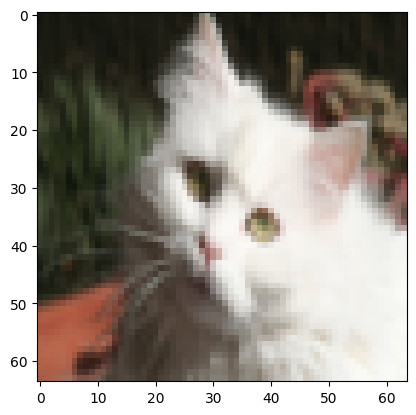

In [8]:
index = 102
# print (X_train[index].reshape(()))
plt.imshow(X_train_orig[index])
print("y = " + str(Y_train[index]) + ", it's a '" +
      classes[np.squeeze(Y_train[index])].decode("utf-8") + "' picture.")

## Implementación en Sklearn


[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba)


In [9]:
clf = neural_network.MLPClassifier(
    solver='sgd',
    alpha=1e-4,
    hidden_layer_sizes=(5),
    learning_rate='constant',
    learning_rate_init=0.001,
    batch_size=20,
    random_state=1,
    max_iter=1000,
    verbose=True)

In [10]:
clf.fit(X_train, Y_train.ravel())

Iteration 1, loss = 0.73637257
Iteration 2, loss = 0.72814070
Iteration 3, loss = 0.72206618
Iteration 4, loss = 0.71784621
Iteration 5, loss = 0.71409639
Iteration 6, loss = 0.70989772
Iteration 7, loss = 0.70659742
Iteration 8, loss = 0.70302878
Iteration 9, loss = 0.69942054
Iteration 10, loss = 0.69628679
Iteration 11, loss = 0.69333155
Iteration 12, loss = 0.69071555
Iteration 13, loss = 0.68790359
Iteration 14, loss = 0.68550357
Iteration 15, loss = 0.68305682
Iteration 16, loss = 0.68085484
Iteration 17, loss = 0.67877683
Iteration 18, loss = 0.67667372
Iteration 19, loss = 0.67460631
Iteration 20, loss = 0.67271247
Iteration 21, loss = 0.67108388
Iteration 22, loss = 0.66907659
Iteration 23, loss = 0.66728475
Iteration 24, loss = 0.66605890
Iteration 25, loss = 0.66441623
Iteration 26, loss = 0.66304044
Iteration 27, loss = 0.66154193
Iteration 28, loss = 0.66013801
Iteration 29, loss = 0.65879022
Iteration 30, loss = 0.65764886
Iteration 31, loss = 0.65623976
Iteration 32, los

MLPClassifier(batch_size=20, hidden_layer_sizes=5, max_iter=1000,
              random_state=1, solver='sgd', verbose=True)

Calculemos cuántos parámetros tiene el modelo:


In [11]:
total_params = 0
for case, name in zip(clf.coefs_, ('wi', 'bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

for case, name in zip(clf.intercepts_, ('wi', 'bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

print('total params = ', total_params)

wi = 61440
bias = 5
wi = 5
bias = 1
total params =  61451


Veamos algunas predicciones de probabilidad:


In [12]:
np.round(np.exp(clf.predict_log_proba(X_train)), 1)

array([[0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9,

Podemos calcular la Accuracy del modelo en el conjunto de datos de entrenamiento:


In [13]:
predictions = clf.predict(X_train)
print(f'Accuracy: {accuracy_score(Y_train, predictions)*100:.2f}')

Accuracy: 94.74


Y ver cuánto da en el conjunto de datos de prueba


In [14]:
predictions = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(Y_test, predictions)*100:.2f}')

print('i, match, case (1=cat, 0=nocat)')
for i, match in enumerate(predictions == Y_test.ravel()):
    if i < 15:
        print(i, match, Y_test[i])

Accuracy: 68.00
i, match, case (1=cat, 0=nocat)
0 True [1]
1 True [1]
2 True [1]
3 True [1]
4 True [1]
5 False [0]
6 True [1]
7 True [1]
8 True [1]
9 True [1]
10 False [1]
11 True [1]
12 True [1]
13 False [0]
14 True [0]


Veamos algunas predicciones:


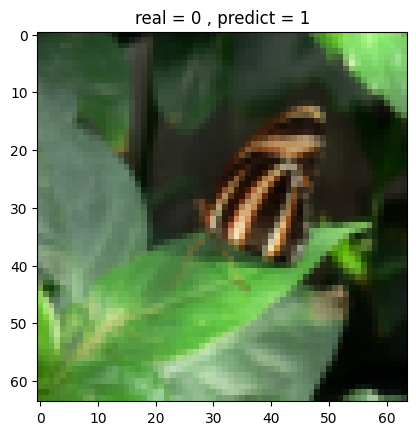

In [15]:
idx = 5
num_px = X_train_orig.shape[1]
plt.imshow(X_test[idx].reshape((num_px, num_px, 3)))
plt.title('real = '+str(Y_test[idx].item())+f' , predict = {predictions[idx]}')
plt.show()

Podemos ver cuál es la función de activación de salida


In [16]:
clf.out_activation_

'logistic'

# Keras


[Documentación](https://keras.io/api/models/model_training_apis/)


Implementemos el mismo clasificador pero construyendo el perceptrón múltiple con Keras


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.regularizers import L2
from keras.utils import set_random_seed

set_random_seed(2)

[Dense layer](https://keras.io/api/layers/core_layers/dense/):

$y = activation(kernel \cdot X+bias)$


Definimos el modelo


In [18]:
model = Sequential([
    Dense(5, input_shape=(X_train.shape[1],),
          activation="relu", kernel_regularizer=L2(1e-4)),
    Dense(1, activation="sigmoid", kernel_regularizer=L2(1e-4))
])

c:\Users\emanu\anaconda3\envs\data_science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Definimos qué optimizador vamos a utilizar, qué función de costo vamos a optimizar y qué métricas almacenar:


In [19]:
opt = SGD(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=["acc"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │        61,445 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,451 (240.04 KB)

 Trainable params: 61,451 (240.04 KB)

 Non-trainable params: 0 (0.00 B)

Ajustamos el modelo:


In [20]:
model.fit(X_train, Y_train.ravel(), batch_size=20, epochs=500,
          validation_data=(X_test, Y_test))

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.5816 - loss: 0.7118 - val_acc: 0.3400 - val_loss: 1.1373
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6474 - loss: 0.6665 - val_acc: 0.3400 - val_loss: 1.1245
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6474 - loss: 0.6545 - val_acc: 0.3400 - val_loss: 1.1124
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6509 - loss: 0.6443 - val_acc: 0.3400 - val_loss: 1.1009
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6468 - loss: 0.6353 - val_acc: 0.3400 - val_loss: 1.0864
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6539 - loss: 0.6277 - val_acc: 0.3400 - val_loss: 1.1358
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6551 - loss: 0.6251 - val_acc: 0.3400 - val_loss: 1.1436
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6586 - loss: 0.6194 - val_acc: 0.3400 - val_loss: 1.1147
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.671

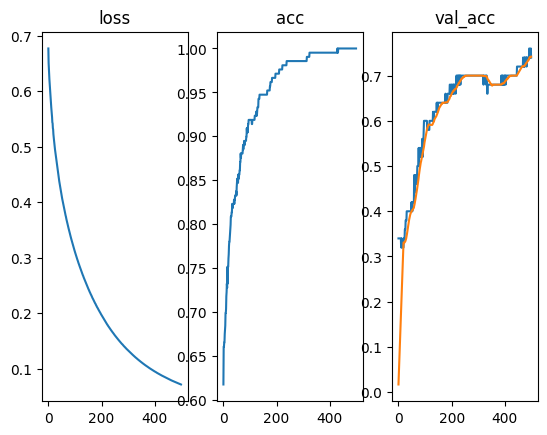

In [21]:
plt.subplot(1, 3, 1)
plt.plot(model.history.history['loss'])
plt.title('loss')
plt.subplot(1, 3, 2)
plt.plot(model.history.history['acc'])
plt.title('acc')
plt.subplot(1, 3, 3)


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret/n


plt.plot(model.history.history['val_acc'])
plt.plot(moving_average(model.history.history['val_acc'], n=20))
plt.title('val_acc')
plt.show()

Podemos acceder a los pesos y almacenarlos si es que nos interesa guardar el modelo:


In [22]:
wnew = model.weights
wnew

[<KerasVariable shape=(12288, 5), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(5,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(5, 1), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential/dense_1/bias>]

Existe el método evaluate para evaluar el modelo en el conjunto de datos de prueba:


In [23]:
model.evaluate(x=X_test, y=Y_test, batch_size=100,)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.7400 - loss: 0.7662


[0.7662143707275391, 0.7400000095367432]

El método predict permite predecir utilizando el modelo entrenado


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
y = 0, you predicted that it is a "cat" picture.


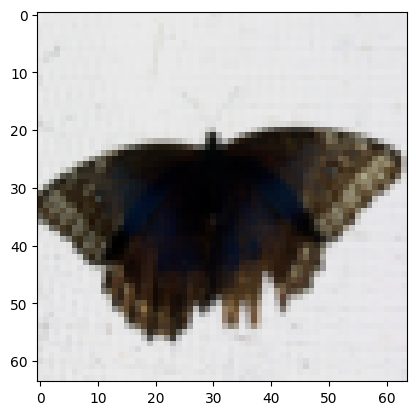

In [24]:
prediction = model.predict(x=X_test)
prediction[prediction > 0.5] = 1
prediction[prediction <= 0.5] = 0
prediction = prediction.squeeze()

index = 13
num_px = X_train_orig[index].shape[0]

plt.imshow(X_test[index, :].reshape((num_px, num_px, 3)))
print("y = " + str(Y_test[index, 0]) + ", you predicted that it is a \"" +
      classes[int(prediction[index])].decode("utf-8") + "\" picture.")

Veamos algunas métricas de bondad de modelo:


              precision    recall  f1-score   support

           0       0.60      0.71      0.65        17
           1       0.83      0.76      0.79        33

    accuracy                           0.74        50
   macro avg       0.72      0.73      0.72        50
weighted avg       0.75      0.74      0.74        50



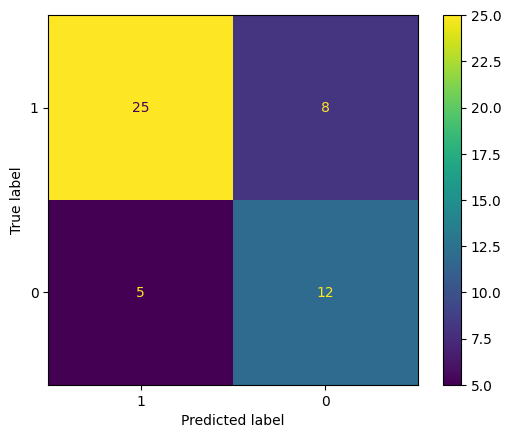

In [25]:
print(classification_report(Y_test, prediction))
ConfusionMatrixDisplay.from_predictions(Y_test, prediction, labels=(1, 0))

# Representación gráfica de la red


In [53]:
# import visualkeras  # hay que instalarlo
# visualkeras.layered_view(model, legend=True)

# from keras.utils import plot_model
# from keras_visualizer import visualizer  # hay que instalarlo
# visualizer(model, file_name='images/keras_visualizer.png',
#            file_format='png', view=False)


# plot_model(model,
#            to_file='images/model.png',
#            show_shapes=True,
#            show_layer_names=False,
#            show_layer_activations=True)

# Ejemplo de uso más interesante


Ahora vamos a centrarnos en entrenar un perceptrón multicapa en un conjunto de datos más grande, como lo es el conjunto mnist de dígitos escritos a mano


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist

In [28]:
# cargamos el conjunto de datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
unique, counts = np.unique(y_train, return_counts=True)
print("Etiquetas de entrenamiento: ", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Etiquetas de prueba: ", dict(zip(unique, counts)))

Etiquetas de entrenamiento:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Etiquetas de prueba:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Muestreamos algunos dígitos:


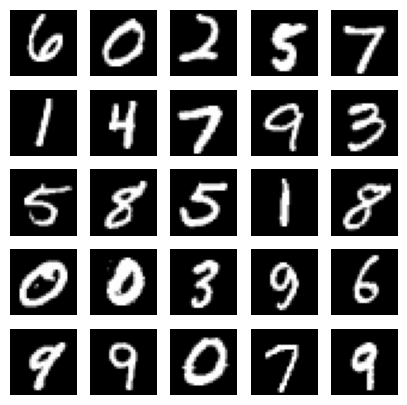

In [29]:
cantidad = 25
indexes = np.random.randint(0, x_train.shape[0], size=cantidad)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

### One-Hot-Encoding

Primero transformamos las etiquetas (números del 0 al 9) a vectores de dimensión 10 en los cuáles sólo será no nulo el elemento cuyo índice de órden sea igual a la etiqueta. Esto es:

$0 = (1,0,0,0,0,0,0,0,0,0)$

$1 = (0,1,0,0,0,0,0,0,0,0)$

$2 = (0,0,1,0,0,0,0,0,0,0)$

$3 = (0,0,0,1,0,0,0,0,0,0)$

$4 = (0,0,0,0,1,0,0,0,0,0)$

$5 = (0,0,0,0,0,1,0,0,0,0)$

$6 = (0,0,0,0,0,0,1,0,0,0)$

$7 = (0,0,0,0,0,0,0,1,0,0)$

$8 = (0,0,0,0,0,0,0,0,1,0)$

$9 = (0,0,0,0,0,0,0,0,0,1)$


In [30]:
from keras.utils import to_categorical, plot_model

In [31]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [32]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Preprocesamiento de los datos

- Suele ser conveniente normalizar los datos para evitar valores muy grandes de gradiente que puedan dificultar el proceso de aprendizaje. Los valores de los pixeles están en escala de grises de 0 a 255.

- El perceptrón múltiple debe aceptar un tensor 1-dimensional, así que hay que transformar los datos de entrada.


In [35]:
# Tamaño de la imagen, que se asume cuadrada
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [36]:
# transformación y normalización
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [37]:
x_train.shape

(60000, 784)

### Parámetros de la red


In [38]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

### Diseño de la arquitectura de la red


- Proponemos un diseño con 3 capas ocultas.

- Las primeras dos capas serán idénticas y completamente conectadas. Tendrán funciones de activación ReLU y implementaremos Dropout.

- Se eligirán 256 neuronas por capa oculta. Este número podría testearse a prueba y error. Se suelen usar múltiplos de 2 como 128, 512, 1024. En un análisis previo se vio que 256 funciona mejor.


In [39]:
modelo_mnist = Sequential()
modelo_mnist.add(Dense(hidden_units, input_dim=input_size,
                 kernel_regularizer=L2(0.001)))
modelo_mnist.add(Activation('relu'))
modelo_mnist.add(Dropout(dropout))
modelo_mnist.add(Dense(hidden_units, kernel_regularizer=L2(0.001)))
modelo_mnist.add(Activation('relu'))
modelo_mnist.add(Dropout(dropout))
modelo_mnist.add(Dense(num_labels))
modelo_mnist.add(Activation('softmax'))
modelo_mnist.summary()

c:\Users\emanu\anaconda3\envs\data_science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Esto sale de:

- Entrada a primera capa: $784 \times 256 + 256 = 200960$
- primera a Segunda capa: $256 \times 256 + 256 = 65792$
- segunda capa a salida: $10 \times 256 + 10 = 2570$
- Total : $200960 + 65972 + 2570 = 269322$


In [40]:
plot_model(modelo_mnist,
           to_file='images/modelo_mnist.png',
           show_shapes=True,
           show_layer_names=False,
           show_layer_activations=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [41]:
opt = Adam(learning_rate=0.001)
modelo_mnist.compile(loss='categorical_crossentropy',
                     optimizer=opt,
                     metrics=["acc"])

In [42]:
modelo_mnist.fit(x_train, y_train, epochs=10,
                 batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7650 - loss: 1.1717 - val_acc: 0.9499 - val_loss: 0.4216
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9342 - loss: 0.4604 - val_acc: 0.9584 - val_loss: 0.3080
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9441 - loss: 0.3553 - val_acc: 0.9650 - val_loss: 0.2609
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9492 - loss: 0.3134 - val_acc: 0.9672 - val_loss: 0.2410
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9523 - loss: 0.2948 - val_acc: 0.9702 - val_loss: 0.2259
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9533 - loss: 0.2849 - val_acc: 0.9686 - val_loss: 0.2268
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9563 - loss: 0.2743 - val_acc: 0.9732 - val_loss: 0.2174
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9579 - loss: 0.2707 - val_acc: 0.9740 - val_loss: 0.2089
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

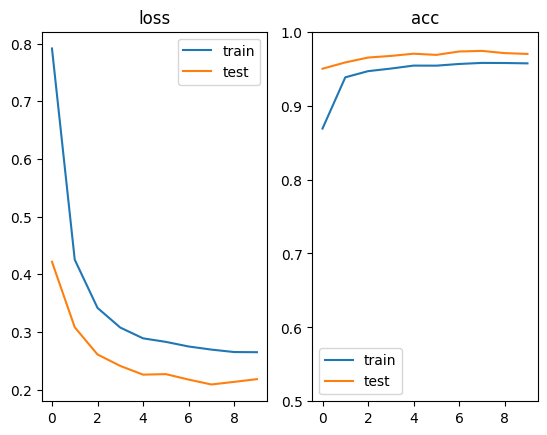

In [43]:
plt.subplot(1, 2, 1)
plt.plot(modelo_mnist.history.history['loss'], label='train')
plt.plot(modelo_mnist.history.history['val_loss'], label='test')
plt.legend()
plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(modelo_mnist.history.history['acc'], label='train')
plt.plot(modelo_mnist.history.history['val_acc'], label='test')
plt.ylim(0.5, 1)
plt.title('acc')
plt.legend()
plt.show()

https://keras.io/getting_started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss


### Sanity check

Overfit a tiny subset of data. Before training on the full dataset try to train on a tiny portion (e.g. 20 examples) of your data and make sure you can achieve zero cost. For this experiment it’s also best to set regularization to zero, otherwise this can prevent you from getting zero cost. Unless you pass this sanity check with a small dataset it is not worth proceeding to the full dataset. Note that it may happen that you can overfit very small dataset but still have an incorrect implementation. For instance, if your datapoints’ features are random due to some bug, then it will be possible to overfit your small training set but you will never notice any generalization when you fold it your full dataset.

[referencia](https://cs231n.github.io/neural-networks-3/#sanitycheck)


Observamos que cada predicción es un array con 10 números, cuyo máximo valor corresponde a la clase predicha.


In [44]:
prediction = modelo_mnist.predict(x=x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


array([[2.7966839e-06, 5.3917870e-06, 7.3304560e-05, ..., 9.9968410e-01,
        8.1388202e-07, 1.1658168e-04],
       [5.3411859e-05, 1.3275836e-03, 9.9823630e-01, ..., 1.5877436e-05,
        4.8545313e-05, 4.8191989e-08],
       [1.8487144e-06, 9.9918693e-01, 7.8406585e-05, ..., 8.8687826e-05,
        1.2405671e-04, 1.6832695e-05],
       ...,
       [2.1209628e-07, 6.6666285e-06, 4.8228327e-07, ..., 5.6940703e-06,
        4.6613991e-06, 9.7176933e-04],
       [1.2159822e-05, 4.3942628e-06, 3.3488197e-07, ..., 1.3860089e-06,
        2.8922074e-04, 6.4885785e-06],
       [5.6009623e-07, 4.4242574e-07, 2.5782865e-06, ..., 2.2019213e-09,
        3.0510597e-07, 1.4842991e-08]], dtype=float32)

Podemos obtener la etiqueta predicha utilizando la función np.argmax


In [45]:
def get_label(x):
    return np.argmax(x)


get_label(prediction[0])

7

Acá tienen unas funciones que pueden servir para observar los resultados predichos:


In [46]:
def plot_image(i, predictions_array, true_label, img, num_px):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape(
        (num_px, num_px, 1))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks(np.linspace(0, 1, 11).round(2))
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

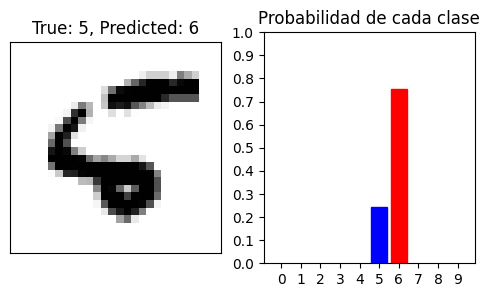

In [47]:
i = 8
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
num_px = 28
plot_image(i, prediction[i], y_test, x_test, num_px)
plt.subplot(1, 2, 2)
plot_value_array(i, prediction[i],  y_test)
plt.title('Probabilidad de cada clase')
plt.show()

## Ejemplos extras

- El ejemplo de esta notebook fue basado en este [enlace](https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras/notebook).

- Va otro [ejemplo](https://www.tensorflow.org/tutorials/keras/classification?hl=es-419) de clasificación de imágenes de ropa.

- Dejo un [ejemplo](https://www.tensorflow.org/tutorials/keras/regression?hl=es-419) de regresión con un perceptrón múltiple en keras para que no crean que es todo sobre imágenes.
